<a href="https://colab.research.google.com/github/juliooaa/Arbnb_T-quio/blob/master/Copy_of_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Tóquio Japão*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Tóquio Japão, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Obtenção dos Dados


Todos os dados utilizados no projeto foram obtidos a partir do site [Inside Airbnd](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* *listings.csv* - *Summary information and metrics for listings in Tokyo (good for visualisations).*


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-04-28/visualisations/listings.csv")

# Análise dos Dados


Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15352 entries, 0 to 15351
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15352 non-null  int64  
 1   name                            15352 non-null  object 
 2   host_id                         15352 non-null  int64  
 3   host_name                       15341 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   15352 non-null  object 
 6   latitude                        15352 non-null  float64
 7   longitude                       15352 non-null  float64
 8   room_type                       15352 non-null  object 
 9   price                           15352 non-null  int64  
 10  minimum_nights                  15352 non-null  int64  
 11  number_of_reviews               15352 non-null  int64  
 12  last_review                     

**Dicionário das variáveis**

* *id* - número de id gerado para identificar o imóvel
* *name* - nome da propriedade anunciada
* *host_id* - número de id do proprietário (anfitrião) da propriedade
* *host_name* - Nome do anfitrião
* *neighbourhood_group* - esta coluna não contém nenhum valor válido
* *neighbourhood* - nome do bairro
* *latitude* - coordenada da latitude da propriedade
* *longitude* - coordenada da longitude da propriedade
* *room_type* - informa o tipo de quarto que é oferecido
* *price* - preço para alugar o imóvel
* *minimum_nights* - quantidade mínima de noites para reservar
* *number_of_reviews* - número de reviews que a propriedade possui
* *last_review* - data do último review
* *reviews_per_month* - quantidade de reviews por mês
* *calculated_host_listings_count* - quantidade de imóveis do mesmo anfitrião
* *availability_365* - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4183,28,18,2018-07-28,0.18,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11048,3,165,2020-03-04,1.57,1,271
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4171,28,113,2020-02-17,1.18,2,241
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,6952,28,103,2020-04-16,1.39,3,364
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3957,28,103,2019-10-04,1.12,2,340


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna

In [3]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos das variáveis
display(df.dtypes)


Entradas:	 15352
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.170010
last_review                       0.170010
host_name                         0.000717
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

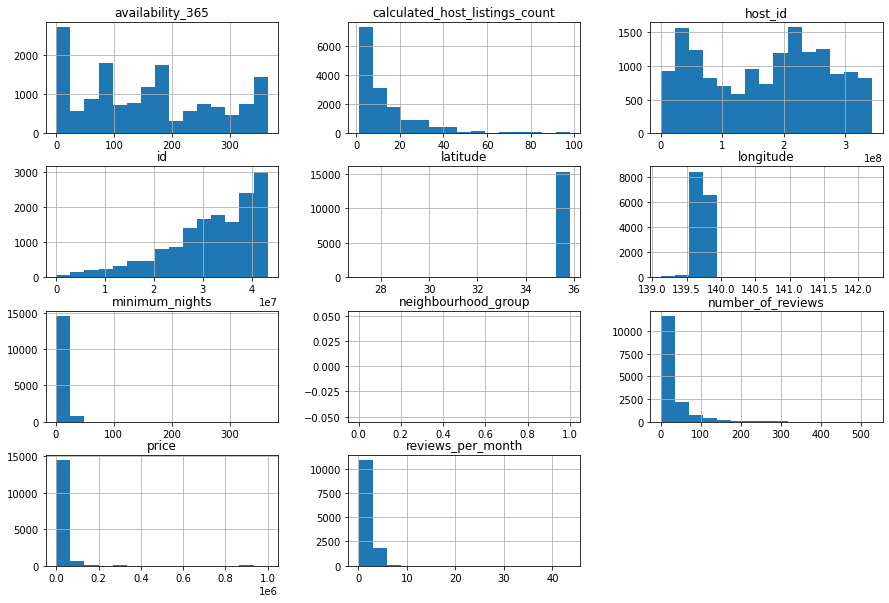

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios de presença de *outliers*. Olhe por exemplo as variáveis *price*, *minimun_nights* e *calculated_host_listings_count*.
Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:
* Resumo estatístico por meio do método *describe*()
* Plotar boxpots para a variável

In [0]:
# ver o resumo estatístico  das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.535200e+04,15352.000000,15352.000000,12742.000000,15352.000000,15352.000000
mean,2.624158e+04,3.293968,26.542731,1.695281,13.434732,155.732348
std,7.636344e+04,9.114849,40.566386,1.365650,15.399161,115.567651
min,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000
25%,6.952000e+03,1.000000,2.000000,0.690000,3.000000,63.000000
50%,1.197900e+04,1.000000,11.000000,1.500000,8.000000,150.000000
75%,2.000100e+04,2.000000,34.000000,2.400000,18.000000,247.000000
max,1.000053e+06,365.000000,529.000000,43.600000,98.000000,365.000000


Olhando o resumo estático acima, podemos confirmar o seguinte:
* A variável *price* possui uma discrepância muito grande entre os valores que estão abaixo de 75% e o seu valor máximo.

#### Boxplot para minimun_nights

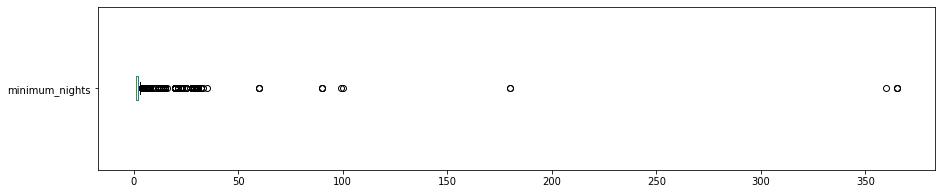

minimum_nights: valores acima de 30:
45 entradas
0.2931%


In [0]:
# minimun_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

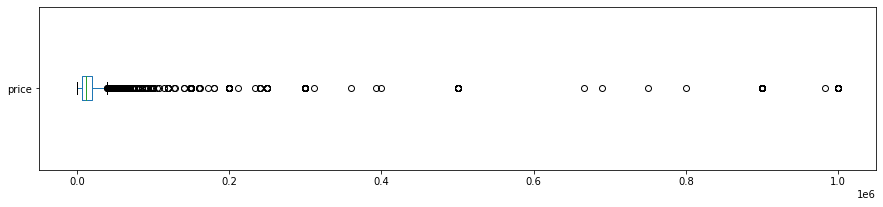


price: valores acima de 0.2
3954 entradas
25.7556%


In [14]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade de valores acima de 0.2 para price
print("\nprice: valores acima de 0.2")
print("{} entradas".format(len(df[df.price > 0.2e+05])))
print("{:.4f}%".format((len(df[df.price > 0.2e+05]) / df.shape[0])*100))

#### Histogramas sem *outliers*

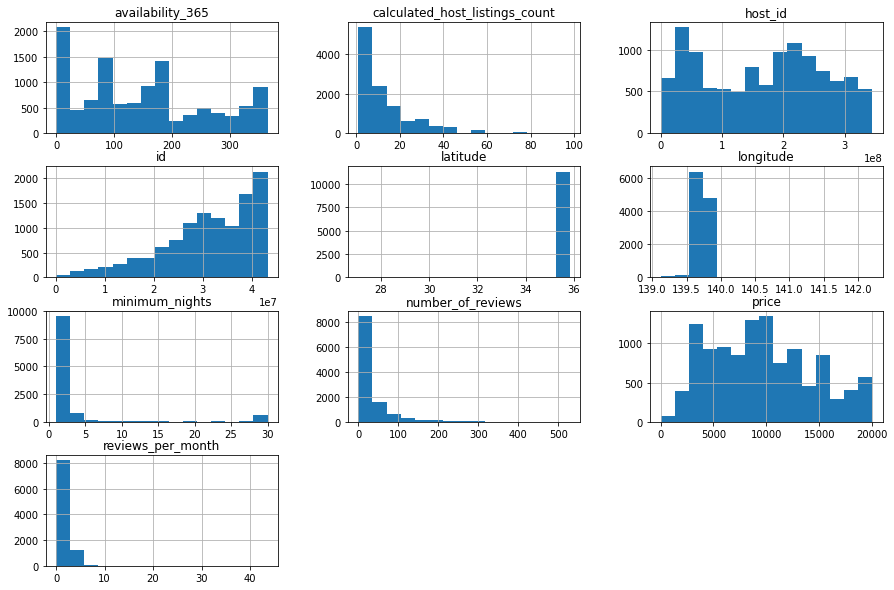

In [22]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 0.2e+05].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace=True)

#remover neighbourhood_group, pois esta vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, irei:
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca seaborn

In [23]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.097441,-0.031128,0.062963,-0.058557,-0.006020
minimum_nights,-0.097441,1.000000,-0.034831,-0.148708,0.109009,0.058636
number_of_reviews,-0.031128,-0.034831,1.000000,0.677856,-0.165216,0.032596
reviews_per_month,0.062963,-0.148708,0.677856,1.000000,-0.132035,0.038221
calculated_host_listings_count,-0.058557,0.109009,-0.165216,-0.132035,1.000000,-0.001312
availability_365,-0.006020,0.058636,0.032596,0.038221,-0.001312,1.000000


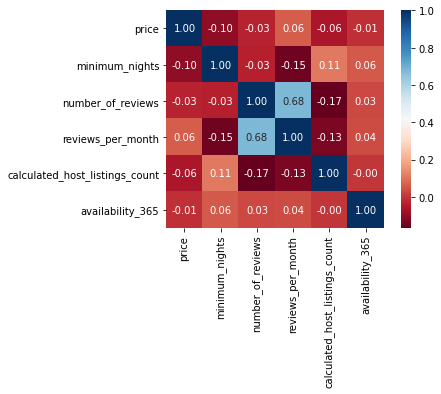

In [24]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável *room_type* indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrência de cada tipo de aluguel, usando o *método value_counts()*.

In [25]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    7201
Private room       2905
Shared room         694
Hotel room          556
Name: room_type, dtype: int64

In [26]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.634114
Private room       0.255812
Shared room        0.061113
Hotel room         0.048961
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Uma maneira de se verificar uma variável em função de outra é usando *groupby()*. No caso, queremos comparar os bairros(*neighbourhoods*) a partir do preço de locação.

In [27]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Miyake Mura      14963.000000
Shibuya Ku       11572.489388
Bunkyo Ku        11044.099174
Minato Ku        10637.645833
Shinjuku Ku      10574.989226
Taito Ku         10283.367375
Hachijo Machi    10011.166667
Niijima Mura      9975.000000
Sumida Ku         9835.950050
Chiyoda Ku        9795.490909
Name: price, dtype: float64

Acima, vemos que bairros como Miyake Mura, Shibuya Ku e Bunkyo Ku estão com média de preço superior a de lugares como Sumida Ku e Chiyoda Ku





Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se

x = longitude

y = latitude

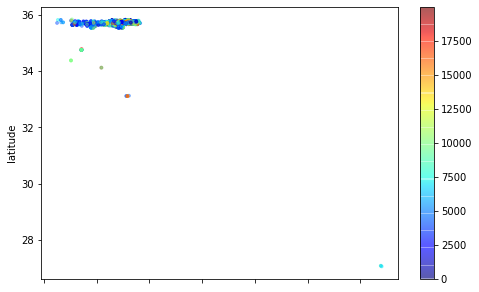

In [30]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(8,5));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Vamos analisar agora qual a média do mínimo de noites para aluguel, esse atributo se encontra na variável *minimum_nights*

In [34]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.338059175766115

# Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Além disso, percebe-se a grande variação dos preços desses imóveis dependendo da localidade.